# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

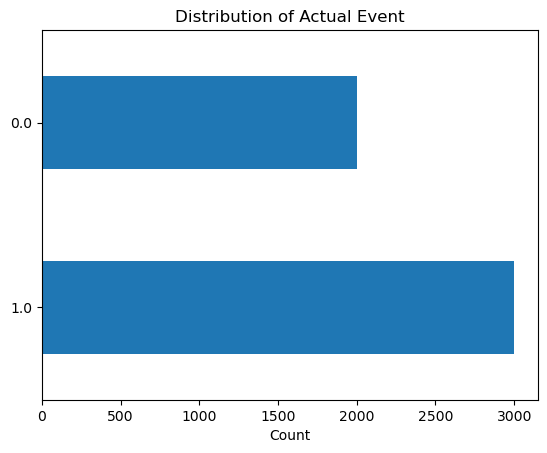

In [4]:
# insert code here
results['actual'].value_counts().plot.barh()
plt.title('Distribution of Actual Event')
plt.xlabel('Count')
plt.show()


### Yes, the actual event class is little imbalanced. There will be little bias because of this, but there is not huge imbalance.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

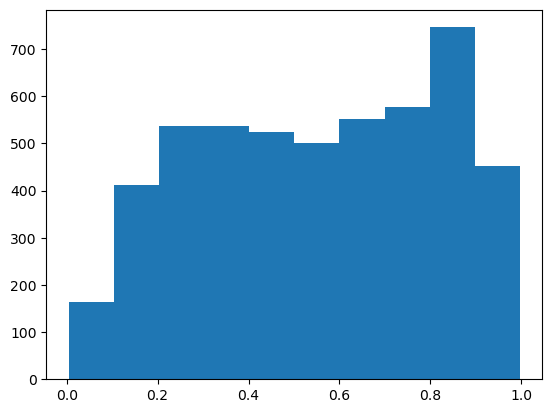

In [5]:
# insert code here
import matplotlib.pyplot as plt
import numpy as np

plt.hist(results['prob'])
plt.show()

### I observed that mostly the distribution is even, only for 0.0 to 0.1 is very less and for the rest it is almost same.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [14]:
# insert code here
from sklearn import metrics
results['pred']=np.where(results['prob'] > 0.5, 1.0, 0.0)
confusion_matrix = metrics.confusion_matrix(results['actual'], results['pred'])
confusion_matrix

array([[1790,  210],
       [ 377, 2623]])

### The threshold we use to evaluate our classifier depends on the nature of the problem we want to solve and the potential consequences of prediction error. So, depending on the case we can set the threshold value. By using 0.5 as threshold we are getting more False Negative.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [18]:
# Calculate accuracy
#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy= (1790+2623)/(1790+2623+210+377)
print("Accuracy:", accuracy)

# Calculate precision
#precision = TP / (TP + FP)
precision=1790/(1790+210)
print("Precision:", precision)

# Calculate recall
#Recall = TP / (TP + FN)
recall = 1790 / (1790+377)
print("Recall:", recall)

Accuracy: 0.8826
Precision: 0.895
Recall: 0.8260267651130595


### Precision is your go-to evaluation metric when dealing with imbalanced data. But it’s not a silver bullet as there are cases when false negatives and true negatives should be taken into account. The F1 Score is a more intricate metric that allows you to get results closer to reality on imbalanced classification problems. 

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

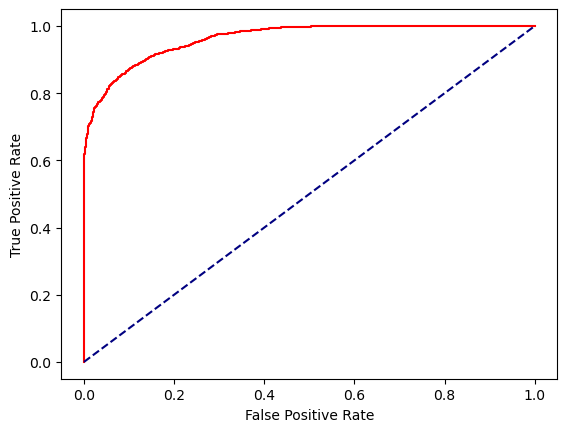

In [19]:
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(results['actual'], results['prob'])
plt.plot(fpr, tpr,'-r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(results['actual'], results['prob'])

0.9626625

### The model looks pretty best fit based on roc score and graph. 